In [1]:
import subprocess
import os 
import re
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score, contingency_matrix

In [2]:
path = os.walk("convertions50")
total_pocks = []
for root, directories, files in path:
    for file in files:
        total_pocks.append(file)
    break

In [3]:
total_pocks

['5u6b_pocket2.pdb',
 '6fd3_pocket1.pdb',
 '2ycf_pocket1.pdb',
 '5lqf_pocket1.pdb',
 '5ew8_pocket1.pdb',
 '4yfi_pocket3.pdb',
 '5yf9_pocket1.pdb',
 '5l2q_pocket1.pdb',
 '5wne_pocket2.pdb',
 '6ccf_pocket2.pdb',
 '1u59_pocket1.pdb',
 '4ckj_pocket1.pdb',
 '1ua2_pocket4.pdb',
 '4bkj_pocket1.pdb',
 '3sxs_pocket1.pdb',
 '4bgq_pocket1.pdb',
 '4z55_pocket1.pdb',
 '3aln_pocket2.pdb',
 '3com_pocket2.pdb',
 '5ax9_pocket4.pdb',
 '4asz_pocket1.pdb',
 '3v5w_pocket1.pdb',
 '3iec_pocket2.pdb',
 '4hcu_pocket1.pdb',
 '2a2a_pocket2.pdb',
 '3dls_pocket1.pdb',
 '4hvs_pocket1.pdb',
 '5ax9_pocket3.pdb',
 '2xrw_pocket1.pdb',
 '2dq7_pocket1.pdb',
 '1byg_pocket1.pdb',
 '4asz_pocket2.pdb',
 '4qpm_pocket3.pdb',
 '3kul_pocket1.pdb',
 '5uyj_pocket1.pdb',
 '1s9i_pocket1.pdb',
 '2fst_pocket1.pdb',
 '5lqf_pocket2.pdb',
 '2r4b_pocket1.pdb',
 '3omv_pocket1.pdb',
 '5k00_pocket1.pdb',
 '5lxc_pocket2.pdb',
 '6fnk_pocket1.pdb',
 '3ggf_pocket2.pdb',
 '2vz6_pocket1.pdb',
 '4lg4_pocket1.pdb',
 '4y8d_pocket2.pdb',
 '4nst_pocket

In [4]:
len(total_pocks)

356

In [10]:
# simil_matrix = np.ones((len(total_pocks),len(total_pocks)))
# simil_matrix = np.ones((len(total_pocks),len(total_pocks)))
# for i in range(len(total_pocks)):
#     for j in range(i+1,len(total_pocks)):
#         print(str(i) +" "+ str(j)+"   "+str(total_pocks[i])+" "+str(total_pocks[j]),end="\r")
#         command = "./find_similarities.sh pockets70/"+str(total_pocks[i])+" pockets70/"+str(total_pocks[j])
# #         print(sp.getoutput(command))
#         simil_matrix[i,j] = simil_matrix[j,i] = float(sp.getoutput(command))
# #         simil_matrix[i,j] = simil_matrix[j,i] = float(sp.getoutput("./find_similarities.sh pocket10.pdb pocket8.pdb"))

In [5]:
simil_matrix = pd.read_excel('simil_matrix50_new.xlsx')
simil_matrix = simil_matrix.drop(['Unnamed: 0'], axis=1)

In [6]:
disim_conversion = lambda t: 1 - t
disimil_matrix = disim_conversion(simil_matrix)

In [7]:
disimil_matrix

,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,350,351,352,353,354,355
0,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.84592,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.89470,1.00000,1.0,0.84816
1,1.00000,0.00000,0.55382,1.00000,0.84658,0.65275,0.73565,0.50684,1.00000,1.00000,...,0.85125,0.66423,0.49557,1.00000,1.00000,0.47763,1.00000,0.56453,1.0,0.37760
2,1.00000,0.55382,0.00000,1.00000,0.84756,0.55884,1.00000,0.48790,1.00000,1.00000,...,0.90375,1.00000,0.55031,1.00000,1.00000,0.65077,1.00000,0.56956,1.0,0.57408
3,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.85158,0.85133,1.00000,0.10148,...,0.67455,0.83514,0.77538,0.79216,0.80219,1.00000,1.00000,1.00000,1.0,0.80271
4,1.00000,0.84658,0.84756,1.00000,0.00000,0.87240,1.00000,1.00000,1.00000,1.00000,...,0.85824,1.00000,1.00000,1.00000,1.00000,0.86167,1.00000,0.87274,1.0,0.84464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1.00000,0.47763,0.65077,1.00000,0.86167,0.66996,0.63149,0.59682,1.00000,0.79559,...,0.77872,0.60405,0.53936,1.00000,1.00000,0.00000,1.00000,0.58587,1.0,0.49957
352,0.89470,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.51509,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.0,0.62157
353,1.00000,0.56453,0.56956,1.00000,0.87274,0.52701,1.00000,0.63866,1.00000,1.00000,...,0.87604,1.00000,0.58048,1.00000,1.00000,0.58587,1.00000,0.00000,1.0,0.58333
354,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.0,1.00000


## Clustering - Searching for number of clusters

In [8]:
kinase_names = []
count = 0
for kinase in total_pocks:
    kin_name = str(kinase[:4])+"_"+re.findall(r'[0-9]+', total_pocks[count][4:])[0]
    kinase_names.append(kin_name)
    count = count + 1

In [9]:
def create_manifold(labels):
    final_clusters = []
    final_clusters.append(kinase_names)
    final_clusters.append(list(labels))
    final_clusters = np.transpose(final_clusters)
    data_pockets_manifold = pd.DataFrame(final_clusters, columns= ['Pockets', 'Clusters'])
    data_pockets_manifold["x"] = mds_coords[:,0]
    data_pockets_manifold["y"] = mds_coords[:,1]
#     data_pockets_manifold["z"] = mds_coords[:,2]
    return data_pockets_manifold

In [10]:
import numpy as np  
from sklearn import metrics
import scipy
import matplotlib.pyplot as plt
from sklearn import manifold  # multidimensional scaling
from matplotlib.pyplot import figure



In [11]:
def create_clusters_file(labels,clusters):
    
    final_clusters = []
    final_clusters.append(kinase_names)
    final_clusters.append(list(labels))
    final_clusters = np.transpose(final_clusters)
    df = pd.DataFrame(final_clusters, columns= ['Kinase', 'Cluster'])
    df.to_excel("Pockets50_DBScan/Pockets50_Clusters_"+str(clusters)+".xlsx", index = False, header=True)


In [12]:
def create_histogram(labels,i):
# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
    freq, bins, patches = plt.hist(labels, edgecolor='white', label='kinases', bins=i)

    # x coordinate for labels
    bin_centers = np.diff(bins)*0.5 + bins[:-1]

    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
                   xy = (x, height),             # top left corner of the histogram bar
                   xytext = (0,0.2),             # offsetting label position above its bar
                   textcoords = "offset points", # Offset (in points) from the *xy* value
                   ha = 'center', va = 'bottom'
                   )
      n = n+1

    plt.legend()
    plt.gca().set(title=str(i)+' Clusters Frequency Histogram', ylabel='Frequency');
    plt.show

In [13]:
mds_model = manifold.MDS(n_components = 3, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(disimil_matrix)  
mds_coords = mds_model.fit_transform(disimil_matrix)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 10 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


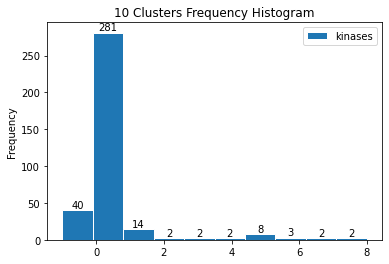

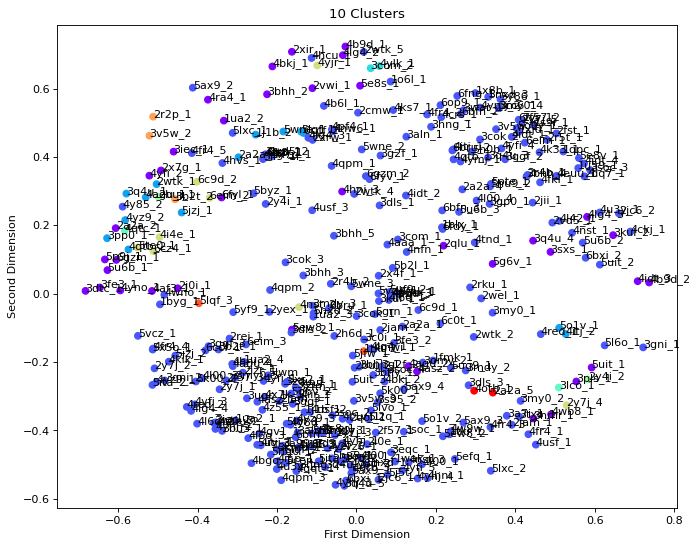

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 5 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


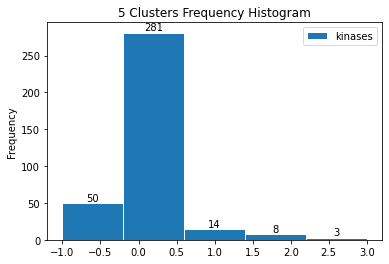

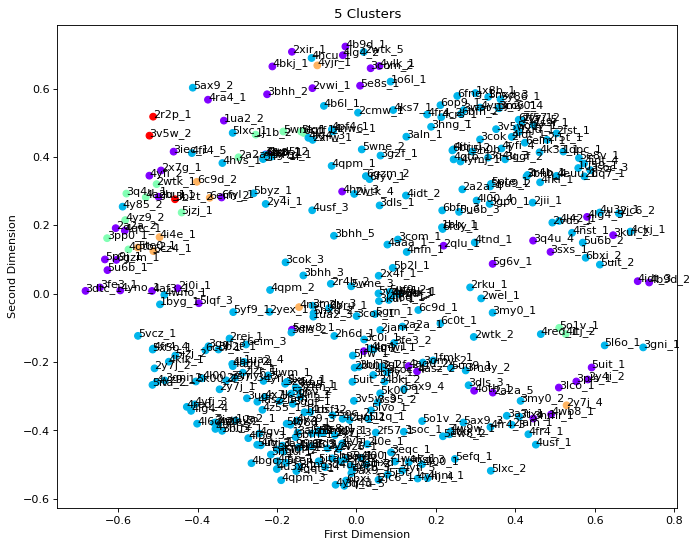

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 4 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


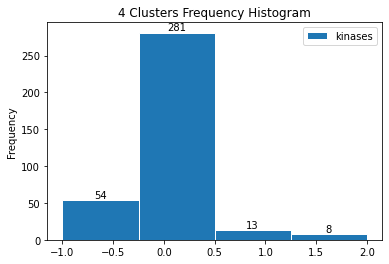

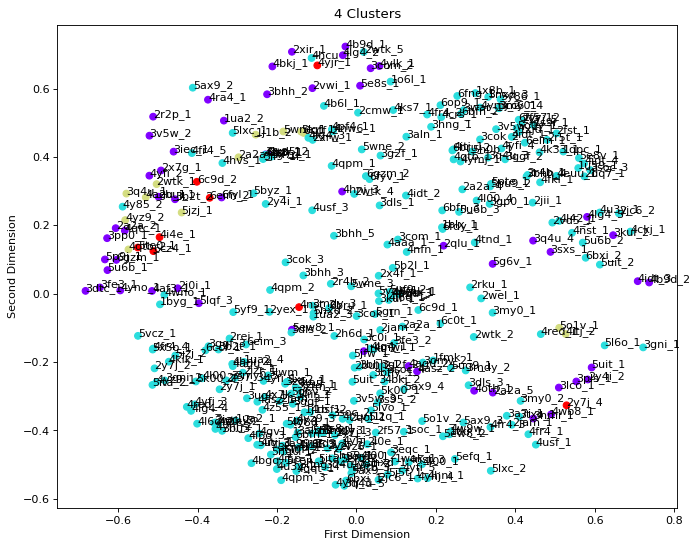

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 4 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


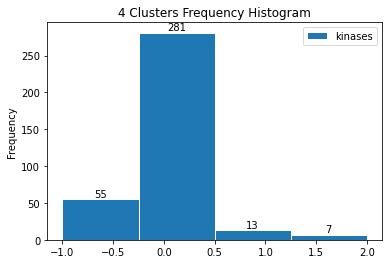

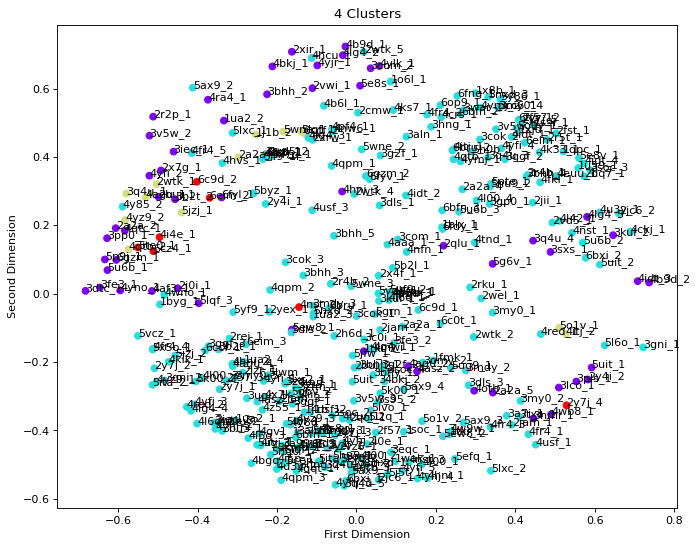

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 4 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


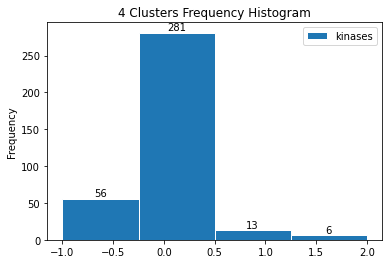

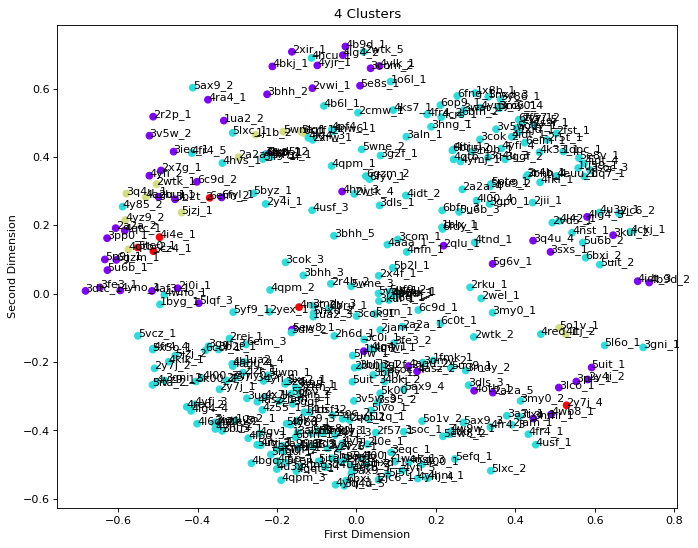

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 3 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


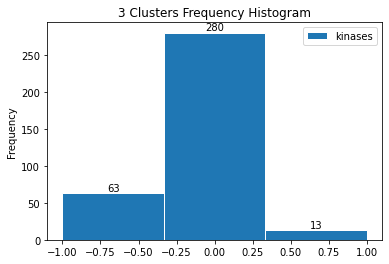

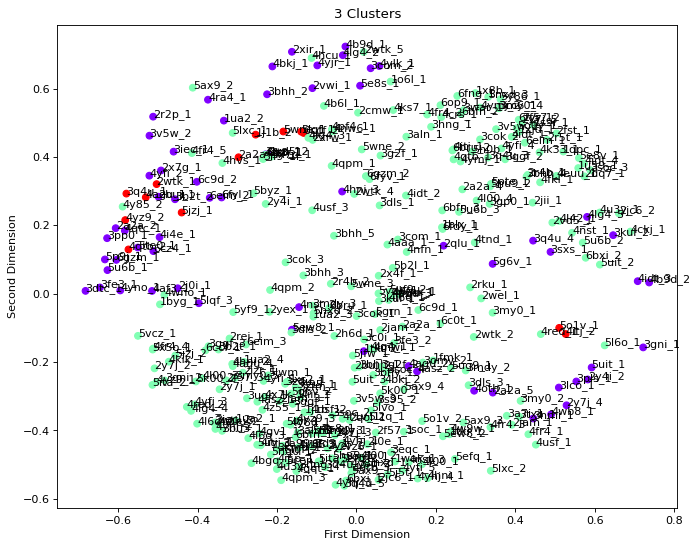

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 3 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


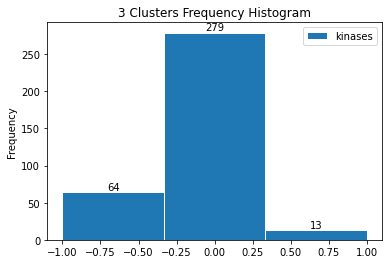

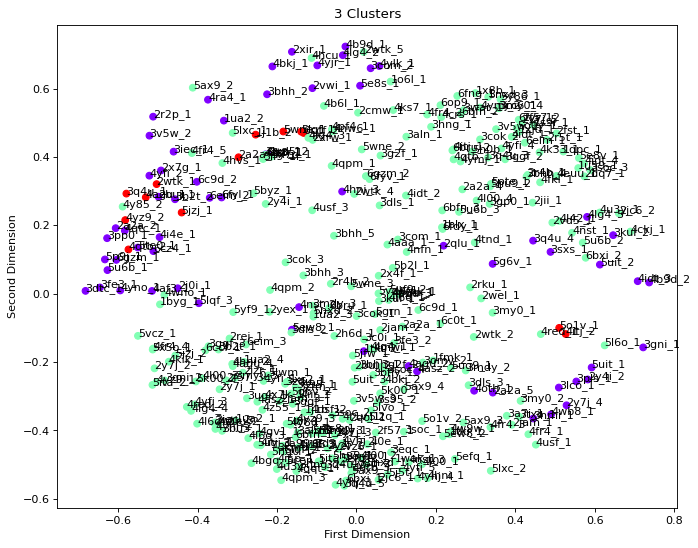

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster 3 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


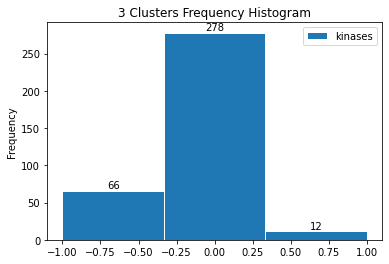

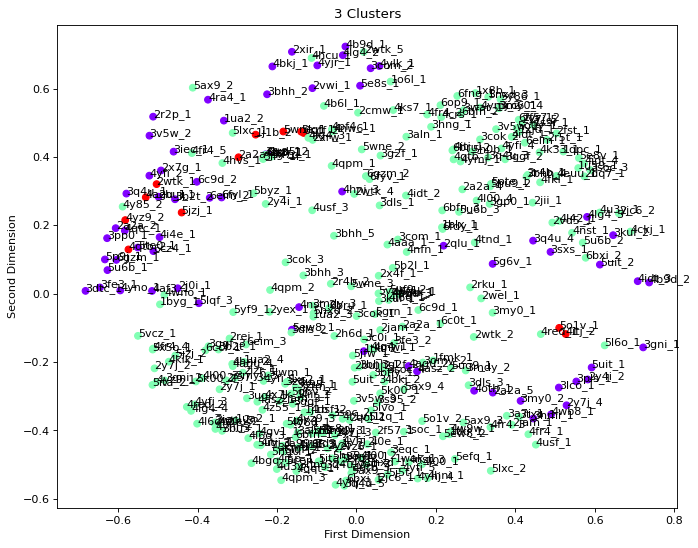

In [23]:
silhouette_totals = []
for i in range(2,10):
#     eps=0.5, min_samples=3  4 clusters
# eps=0.5, min_samples=5 2 clusters
    cluster = DBSCAN(eps=0.7, min_samples=i, metric ='precomputed').fit(disimil_matrix)
    unique_labels = np.unique(np.array(cluster.labels_))
    num_clusters = len(unique_labels)
    create_histogram(cluster.labels_,num_clusters)
    create_clusters_file(cluster.labels_,num_clusters)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Cluster "+str(num_clusters)+" ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    ###### plot 1 ################
    data_kinases_manifold = create_manifold(cluster.labels_)
    fig = px.scatter(data_kinases_manifold, x="x", y="y", color="Clusters", hover_data=["Pockets"],title=str(num_clusters)+' Clusters')
    fig.show()
    ###### plot 2 ################
#     fig = px.scatter_3d(data_kinases_manifold, x='x', y='y', z='z',
#               color="Clusters",range_z = (0, 300),hover_data=["Pockets"], title=str(i)+' Clusters')
#     fig.show()
    ##### plot 3 ###############
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(mds_coords[:,0],mds_coords[:,1], c=cluster.labels_, cmap='rainbow')
    #     facecolors = 'red', edgecolors = 'none')  # points in white (invisible)
    labels = kinase_names
    for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
        plt.annotate(label, (x,y), xycoords = 'data')
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    plt.title(str(num_clusters)+" Clusters")   
    plt.show()
#     silhouette_totals.append(metrics.silhouette_score(disimil_matrix, cluster.labels_, metric='precomputed'))

In [22]:
silhouette_totals

[0.18265052667818008,
 0.1655674549683078,
 0.1609391027863622,
 0.12604685415423333,
 0.1256472159848404,
 0.113673108899594,
 0.11746043365062524,
 0.11639869105389339,
 0.11693406006407531,
 0.10889935671683,
 0.12463644270556976,
 0.12247794483144635,
 0.12109695434878084,
 0.1207650563231048,
 0.12072653815988137,
 0.12104730332526746,
 0.12173872462780386]

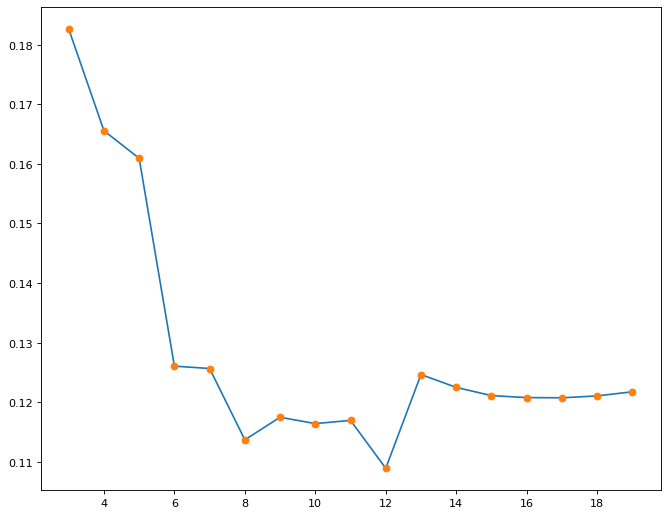

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = range(3, 20)
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(x, silhouette_totals)
plt.plot(x, silhouette_totals, 'o')
plt.show()